## Image processing solution - Part 1
Solution imports from script `part1_soln.py`

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle
from skimage.transform import resize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import part1_soln as p1  # import functions from script

### 1) & 2) Read in and display the images

In [3]:
imgs = p1.get_images()

In [4]:
imgs.keys()

dict_keys(['Einstein', 'Goodall', 'Forest', 'Beach'])

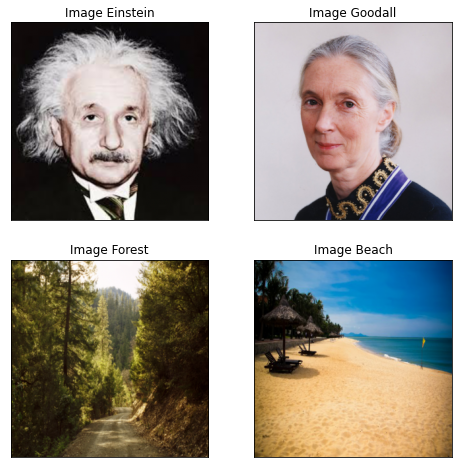

In [5]:
p1.plot_images(imgs, save_title='question2.png', show = True)

In [6]:
imgs['Einstein'].shape  # pixel rows, pixel columns, 3 channels (red, green, blue)

(300, 300, 3)

### 3) Differentiate between male/female, landscapes
For differentiating between people, color would be helpful for ethnicity, but not sex.  For landscape, color is an important differentiator (snow, beach, forest, plains, canyons, etc.)  Will choose to grayscale the male-female images.

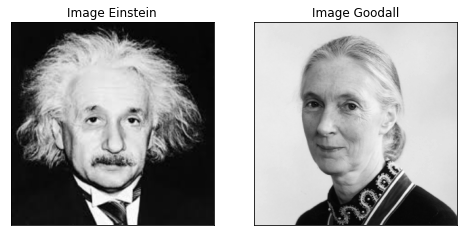

In [7]:
mf_imgs = {k: imgs[k] for k in ('Einstein', 'Goodall')}
gray_imgs = p1.grayscale(mf_imgs, show_bool=True) 

In [8]:
gray_imgs['Einstein'].shape  # gray-scale image, pixel rows, pixel cols, 1 channel

(300, 300)

### 4) Apply Sobel and Canny filters

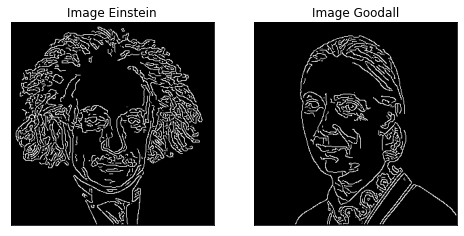

In [9]:
canny_imgs = p1.apply_filter(gray_imgs, img_filter=canny, save_title = 'canny.png',
                             show_bool = True) 

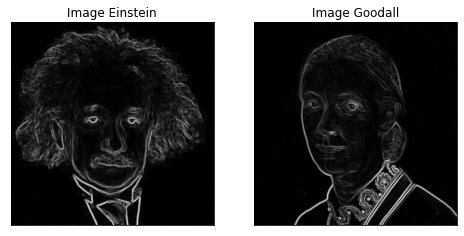

In [10]:
sobel_imgs = p1.apply_filter(gray_imgs, img_filter=sobel, save_title = 'sobel.png',
                             show_bool=True)

### Try different values of sigma in the Canny filter

Sigma: 0


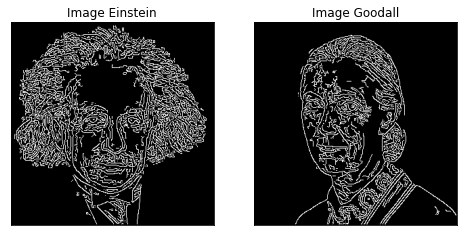

Sigma: 1


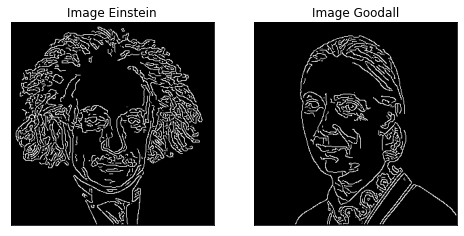

Sigma: 2


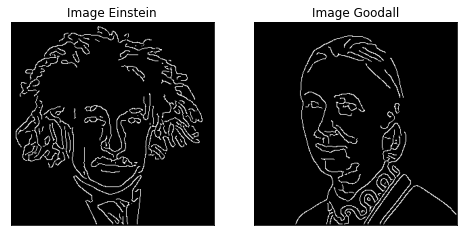

Sigma: 3


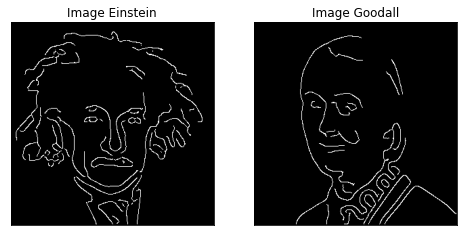

Sigma: 4


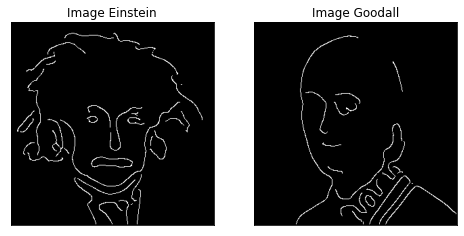

In [11]:
p1.test_canny_sigma(gray_imgs)

#### In the effort to tell men and women apart - a "beard" feature seems useful!  Sigma = 1 removes some complexity in the images but still retains the beard edges.

### 5) Denoise the images

bilateral denoising
Sigma, spatial: 0.2


<Figure size 432x288 with 0 Axes>

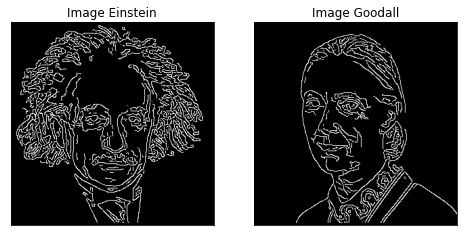

Sigma, spatial: 0.4


<Figure size 432x288 with 0 Axes>

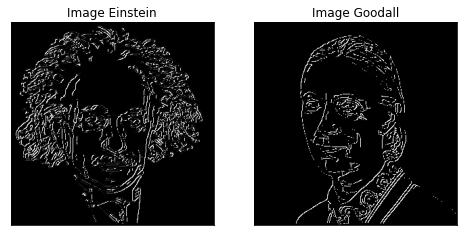

Sigma, spatial: 0.6000000000000001


<Figure size 432x288 with 0 Axes>

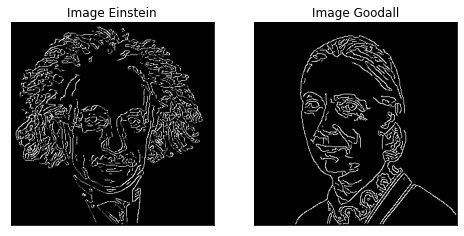

Sigma, spatial: 0.8


<Figure size 432x288 with 0 Axes>

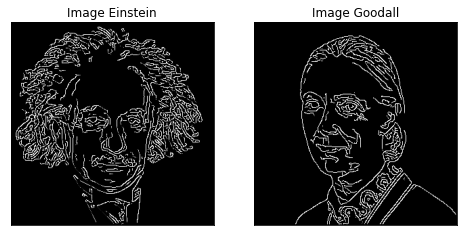

In [12]:
imgs_bilateral = p1.test_denoise(gray_imgs, denoise = denoise_bilateral, 
                              save_title = 'Hooplah.png', show_bool=True)

tv_chambolle denoising
Sigma, spatial: 0.3


<Figure size 432x288 with 0 Axes>

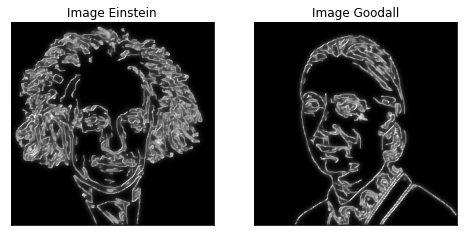

Sigma, spatial: 0.8400000000000001


<Figure size 432x288 with 0 Axes>

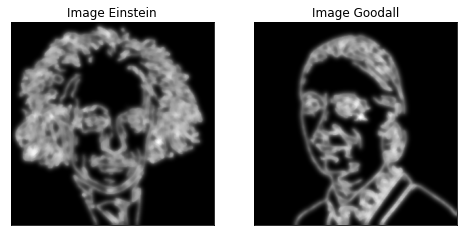

Sigma, spatial: 1.3800000000000001


<Figure size 432x288 with 0 Axes>

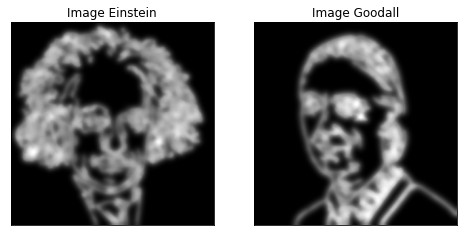

Sigma, spatial: 1.9200000000000002


<Figure size 432x288 with 0 Axes>

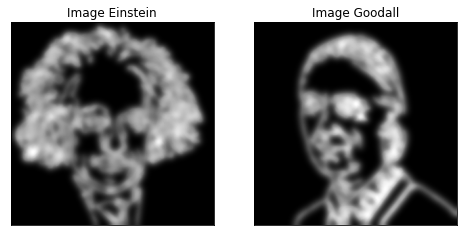

Sigma, spatial: 2.46


<Figure size 432x288 with 0 Axes>

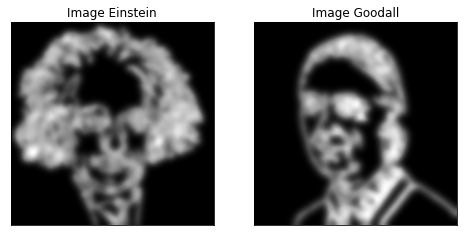

In [13]:
imgs_tv = p1.test_denoise(gray_imgs, denoise = denoise_tv_chambolle, 
                              save_title = 'Hooplah2.png', show_bool=True)

#### TV Chambolle denoising might be useful for detecting large amounts of hair, which may be a differentiator between (most) men and women.

### 6) Extract most dominant colors
Use KMeans on the color images to find K=3 most dominant colors

In [14]:
color_imgs = {k: imgs[k] for k in ('Forest', 'Beach')}

In [15]:
clusters = p1.apply_KMeans(color_imgs)

In [16]:
forest_cluster = clusters[0]
for i, rgb in enumerate(forest_cluster):
    print(f"Color {i} normalized rgb is {np.around(rgb,3)}.")

Color 0 normalized rgb is [0.201 0.157 0.065].
Color 1 normalized rgb is [0.925 0.895 0.846].
Color 2 normalized rgb is [0.5   0.443 0.235].


In [17]:
beach_cluster = clusters[1]
for i, rgb in enumerate(forest_cluster):
    print(f"Color {i} normalized rgb is {np.around(rgb,3)}.")

Color 0 normalized rgb is [0.201 0.157 0.065].
Color 1 normalized rgb is [0.925 0.895 0.846].
Color 2 normalized rgb is [0.5   0.443 0.235].


### 7) Featurize the gray-scale images
Flatten the 2d matrix into a 1D vector

In [18]:
imgs_featurized_1row = p1.featurize(gray_imgs)

In [19]:
imgs_featurized_1row[0].shape  #300 x 300 pixels = 90000

(90000,)

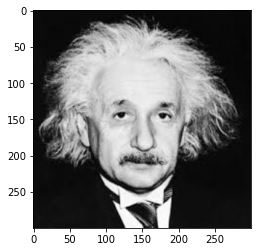

In [20]:
plt.imshow(imgs_featurized_1row[0].reshape(300,300), cmap='gray');